In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a DataFrame
file_path = Path("data.csv")
data = pd.read_csv(file_path)
data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
cleanData = data[['valence', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'popularity']]

In [5]:
cleanData.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,0.098393,116.861590,31.431794
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,0.162740,30.708533,21.826615
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,0.034900,93.421000,11.000000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,0.045000,114.729000,33.000000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,0.075600,135.537000,48.000000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.970000,243.507000,100.000000


In [6]:
cleanData.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954,4
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936,5
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339,5
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109,3
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665,2


In [7]:
X = cleanData.iloc[:, 0:14].values
y = cleanData.iloc[:, 14].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=78
)

In [14]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)


In [15]:
nn = Sequential()

# Hidden layer
nn.add(Dense(units=64, input_dim=14, activation="relu"))

# Second hidden layer
nn.add(Dense(units=32, activation="relu"))

# third hidden layer
nn.add(Dense(units=16, activation="relu"))

# fouth hidden layer
nn.add(Dense(units=8, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))


In [16]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [17]:
# Fit the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=10)

Epoch 1/10
3734/3734 [==============================] - 7s 2ms/step - loss: 303.2990 - mse: 303.2990 - val_loss: 224.3682 - val_mse: 224.3682
Epoch 2/10
3734/3734 [==============================] - 6s 2ms/step - loss: 90.1012 - mse: 90.1012 - val_loss: 195.2912 - val_mse: 195.2912
Epoch 3/10
3734/3734 [==============================] - 7s 2ms/step - loss: 88.9417 - mse: 88.9417 - val_loss: 160.3671 - val_mse: 160.3671
Epoch 4/10
3734/3734 [==============================] - 7s 2ms/step - loss: 89.1846 - mse: 89.1846 - val_loss: 175.0297 - val_mse: 175.0297
Epoch 5/10
3734/3734 [==============================] - 7s 2ms/step - loss: 87.5683 - mse: 87.5683 - val_loss: 171.9858 - val_mse: 171.9858
Epoch 6/10
3734/3734 [==============================] - 7s 2ms/step - loss: 88.0925 - mse: 88.0925 - val_loss: 160.5412 - val_mse: 160.5412
Epoch 7/10
3734/3734 [==============================] - 7s 2ms/step - loss: 86.6763 - mse: 86.6763 - val_loss: 191.7766 - val_mse: 191.7766
Epoch 8/10
3734/37

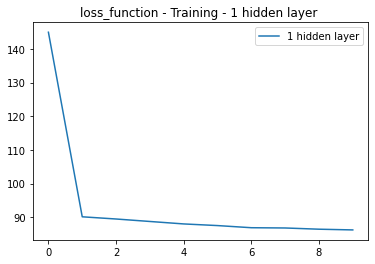

In [18]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.title("loss_function - Training - 1 hidden layer ")
plt.legend(["1 hidden layer"])
plt.show()

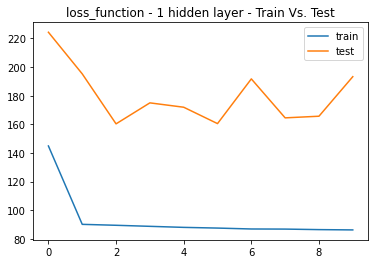

In [19]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

In [28]:
df = pd.DataFrame(y_test,columns=['actual'])

In [29]:
df['predicted'] = nn.predict(X_test)

In [27]:
df.head()

,actual,predicted
0,42,38.075493
1,38,38.132992
2,0,1.356677
3,25,36.467716
4,54,47.373215


In [30]:
from scipy.stats import ttest_ind

ttest_ind(df['actual'], df['predicted'])


Ttest_indResult(statistic=-25.345203673758196, pvalue=3.3927747140290743e-141)

In [31]:
nn_json = nn.to_json()

In [32]:
filepath = 'deep_model.json'
with open(filepath, 'w') as json_file:
  json_file.write(nn_json)

In [33]:
filepath = 'deep_model.h5'
nn.save_weights(filepath)